In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from google.colab.patches import cv2_imshow
from PIL import Image
import cv2

## 이미지 데이터 증강_rotation
< 방법 >

    1. rotation
        이미지를 회전 시킴.
    
    2. grayscale
        이미지를 회색으로 바꾸는 것.

In [8]:
# 1. rotation

import imgaug as ia # image augmentation을 간편하게 해주는 라이브러리
import imgaug.augmenters as iaa
import imageio
from imgaug.augmentables.bbs import BoundingBox , BoundingBoxesOnImage

ia.seed(1)

In [9]:
# 파일 위치
path = "/content/drive/MyDrive/dmz_teamproject/dataset/detection_data.v4i.yolov5pytorch/train/images/"

In [10]:
# label information 저장
informations = []

for file in listdir(path):
    
    image = imageio.imread(path + file)
    #image = Image.open(path + file)
    labelfile = file.replace('.jpg' , '.txt')
    f = open('/content/drive/MyDrive/dmz_teamproject/dataset/detection_data.v4i.yolov5pytorch/train/labels/' + labelfile)
    boundingboxes = f.readlines()

    informations.append(boundingboxes)

<ipython-input-10-3a0b9f000f21>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path + file)


In [11]:
# 처리

for i in range(len(informations)):

    for k in range(len(informations[i])):
        
        box_info = informations[i][k].split(" ")

        for j in range(len(box_info)):

            if box_info[j] == '0':
                box_info[j] = 0
            else:
                x = float(box_info[j])
                box_info[j] = x
        
        informations[i][k] = box_info

In [12]:
boundingbox_newinfo = []

for i in range(len(informations)):
    
    for j in range(len(informations[i])):

        data = informations[i][j]
        
        label_info = int(data[0])
        x_center = data[1]
        y_center = data[2]
        height = data[4] * 832
        width = data[3] * 1664

        x_center_new = x_center * 1664
        y_center_new = y_center * 832

        x1 = int(x_center_new - width / 2)
        y1 = int(y_center_new - height / 2)
        x2 = int(x_center_new + width / 2)
        y2 = int(y_center_new + height / 2)

        boundingbox_newinfo.append([label_info , x1 , y1 , x2 , y2])

In [13]:
ia_bounding_boxes = []
rotate_images = []
idx = 0

for file in listdir(path):
    
    image = imageio.imread(path + file)
    labelfile = file.replace('.jpg' , '.txt')
    f = open('/content/drive/MyDrive/dmz_teamproject/dataset/detection_data.v4i.yolov5pytorch/train/labels/' + labelfile)
    boundingboxes = f.readlines()

    length = len(boundingboxes)
    
    for j in range(length):
        ia_bounding_boxes.append(ia.BoundingBox(x1 = boundingbox_newinfo[idx][1],
                                                y1 = boundingbox_newinfo[idx][2],
                                                x2 = boundingbox_newinfo[idx][3],
                                                y2 = boundingbox_newinfo[idx][4],
                                                label = boundingbox_newinfo[idx][0]))
        idx += 1
    
    bbs = ia.BoundingBoxesOnImage(ia_bounding_boxes , shape = image.shape)

    seq = iaa.Sequential([
        iaa.Affine(rotate = 20)
    ])

    image_aug , bbs_aug = seq(image = image , bounding_boxes = bbs)

    rotate_images.append((image_aug , bbs_aug))

    ia_bounding_boxes = []

<ipython-input-13-08e4777fd693>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path + file)


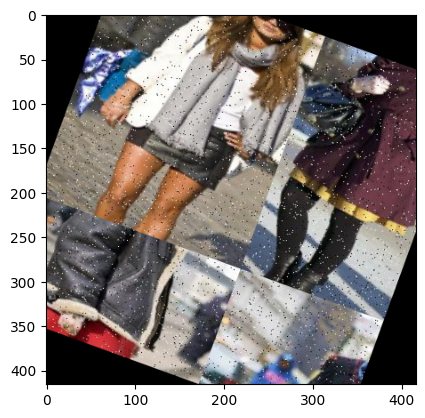

In [22]:
plt.imshow(rotate_images[0][0])

In [23]:
# 변환된 사진 저장
idx = 0
for file in listdir(path):

    image = imageio.imread(path + file)
    labelfile = file.replace('.jpg' , '.txt')

    cv2.imwrite('/content/drive/MyDrive/dmz_teamproject/dataset/detection_data.v4i.yolov5pytorch/train/rotate_image/' + "rotate__" + file , rotate_images[idx][0])

    for idx_1 in range(len(rotate_images)):

        f = open('/content/drive/MyDrive/dmz_teamproject/dataset/detection_data.v4i.yolov5pytorch/train/rotate_labels/' + "rotate__" + labelfile , "w")

        for idx_2 in range(len(rotate_images[idx_1][1])):

            label = rotate_images[idx_1][1][idx_2].label
            x1 = rotate_images[idx_1][1][idx_2].x1
            y1 = rotate_images[idx_1][1][idx_2].y1
            x2 = rotate_images[idx_1][1][idx_2].x2
            y2 = rotate_images[idx_1][1][idx_2].y2

            f.write(str(label) + " ")
            f.write(str(x1) + " ")
            f.write(str(y1) + " ")
            f.write(str(x2) + " ")
            f.write(str(y2))

            f.write("\n")    

    idx += 1   

<ipython-input-23-8be82287534a>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path + file)


# 이미지 증강_grayscale

In [25]:
from random import *

In [27]:
path = "/content/drive/MyDrive/dmz_teamproject/dataset/detection_data.v4i.yolov5pytorch/train/rotate_image/"
newpath = "/content/drive/MyDrive/dmz_teamproject/dataset/detection_data.v4i.yolov5pytorch/train/rotate_grayscale_image/"

In [28]:
for file in listdir(path):
    
    img = Image.open(path + file).convert('L')
    img_numpy = np.array(img , 'uint8')
    cv2.imwrite(newpath+file , img_numpy)